In [ ]:
#The goal of this EDA is to see if any clusterings can be found in the CollegeScorecard dataset WITHOUT any modeling, but just by pair-plotting some interesting pairs of variables and coloring the datapoints with categories from another variable. We also want to get a better feel of the data by plotting it. It could help identify interesting patterns, help us eliminate outliers, etc

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
df = pd.read_csv("./data/WrangledCollegeScorecard.csv")

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7804 entries, 0 to 7803
Columns: 223 entries, Unnamed: 0 to NOTFIRSTGEN_RPY_3YR_RT_SUPP
dtypes: float64(212), int64(10), object(1)
memory usage: 13.3+ MB


In [70]:
df.columns

Index(['Unnamed: 0', 'UNITID', 'OPEID', 'opeid6', 'INSTURL', 'HCM2', 'main',
       'NUMBRANCH', 'CONTROL', 'st_fips',
       ...
       'LO_INC_RPY_3YR_RT_SUPP', 'MD_INC_RPY_3YR_RT_SUPP',
       'HI_INC_RPY_3YR_RT_SUPP', 'DEP_RPY_3YR_RT_SUPP', 'PELL_RPY_3YR_RT_SUPP',
       'NOPELL_RPY_3YR_RT_SUPP', 'FEMALE_RPY_3YR_RT_SUPP',
       'MALE_RPY_3YR_RT_SUPP', 'FIRSTGEN_RPY_3YR_RT_SUPP',
       'NOTFIRSTGEN_RPY_3YR_RT_SUPP'],
      dtype='object', length=223)

In [5]:
# Potential Regression Features to explore - 

# 1)Public/PrivateNonprofit/Private For-Profit (CONTROL)
# 2)Admission rate (ADM_RATE_ALL)
# 3)Cost of attendance (COSTT4_P)
# 4)Undergraduate students by family income (INC_PCT_[LO/M1/M2/H1/H2])
# 5)25 and above students (UG25abv)
# 6)Percentage of federal loan (PCTFLOAN)
# 7)First gen students (PAR_ED_PCT_[1STGEN/MS/HS/PS])
# 8)DEBT_MDN, GRAD_DEBT_MDN, WDRAW_DEBT_MDN,PELL_DEBT_MDN,NOPELL_DEBT_MDN,FEMALE_DEBT_MDN,MALE_DEBT_MDN,FIRSTGEN_DEBT_MDN,NOTFIRSTGEN_DEBT_MDN,
# 9)DEBT_N, GRAD_DEBT_N, WDRAW_DEBT_N,PELL_DEBT_N,NOPELL_DEBT_N,FEMALE_DEBT_N,MALE_DEBT_N,FIRSTGEN_DEBT_N,NOTFIRSTGEN_DEBT_N,
# 10)Percentage of degrees awarded in each two-digit CIP field of study (PCIP[01-54])
# 11)Fraction of borrowers at institution making repayment progress after x years leaving the school (RPY_xYR_RT)


# Potential Classification Features to hue potential clusters with
#CONTROL, region, HBCU/ANNHI/PBI/AANAPII/NANTI/HSI/TRIBAL, MENONLY/WOMENONLY

In [71]:
#What string columns are available?

string_cols = df.select_dtypes('object')
string_cols.columns

Index(['INSTURL'], dtype='object')

In [72]:
# Clearly, there aren't many string columns in the dataset. However, hue-ing variables may still exist as numerically encoded labels
# These functions are there to potentially help with discretizing numeric columns into buckets that can be used as hue-ing variables

import math
def discretize_column_into_intervals(df, column, intervals):
    interval_size = math.ceil((df[column].max() - df[column].min()+1)/intervals)
    bins = list(range(df[column].min()-1, df[column].max()+interval_size, interval_size))
    labels = [f'{column}_bin_{i}' for i in range(len(bins)-1)]
    return pd.cut(df[column], bins, labels=labels, include_lowest=True)

def discretize_column_into_qtiles(df, column, qtiles):
    labels = [f'{column}_qtile_{i}' for i in range(qtiles)]
    return pd.qcut(df[column], qtiles, labels=labels)

In [ ]:
#It's time to start building some plots

<AxesSubplot:xlabel='UG25abv', ylabel='DEBT_MDN'>

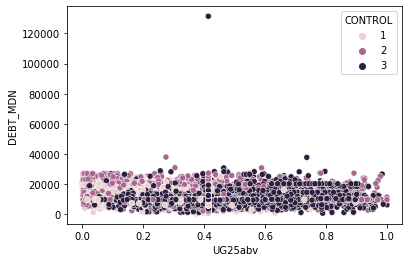

In [8]:
sns.scatterplot(x='UG25abv', y='DEBT_MDN', hue='CONTROL', data=df)

In [73]:
#There is an annoying outlier. Let's drop it, since it could affect outlier-sensitive clustering algorithms like KMeans

df = df[df['DEBT_MDN'] != df['DEBT_MDN'].max()]

<AxesSubplot:xlabel='UG25abv', ylabel='DEBT_MDN'>

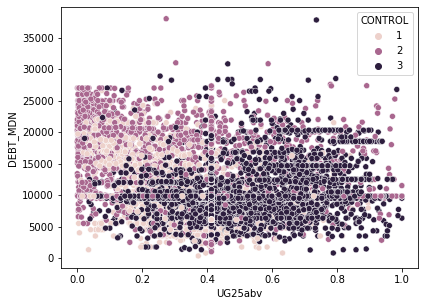

In [86]:
sns.scatterplot(x='UG25abv', y='DEBT_MDN', hue='CONTROL', data=df)

<AxesSubplot:xlabel='UG25abv', ylabel='PCTFLOAN'>

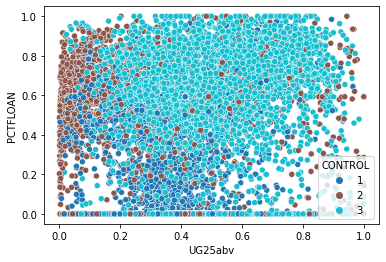

In [11]:
sns.scatterplot(x='UG25abv', y='PCTFLOAN', hue='CONTROL', data=df, palette=sns.color_palette('tab10', as_cmap=True))

In [ ]:
#Some of these plots show interesting patterns, but they arent convincing enough as clusters. Perhaps we should try more combinations of variables, but in a more automated fashion. How about a seaborn pairplot?

/Users/sidharthramanan/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/sidharthramanan/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/sidharthramanan/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/sidharthramanan/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/sidharthramanan/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


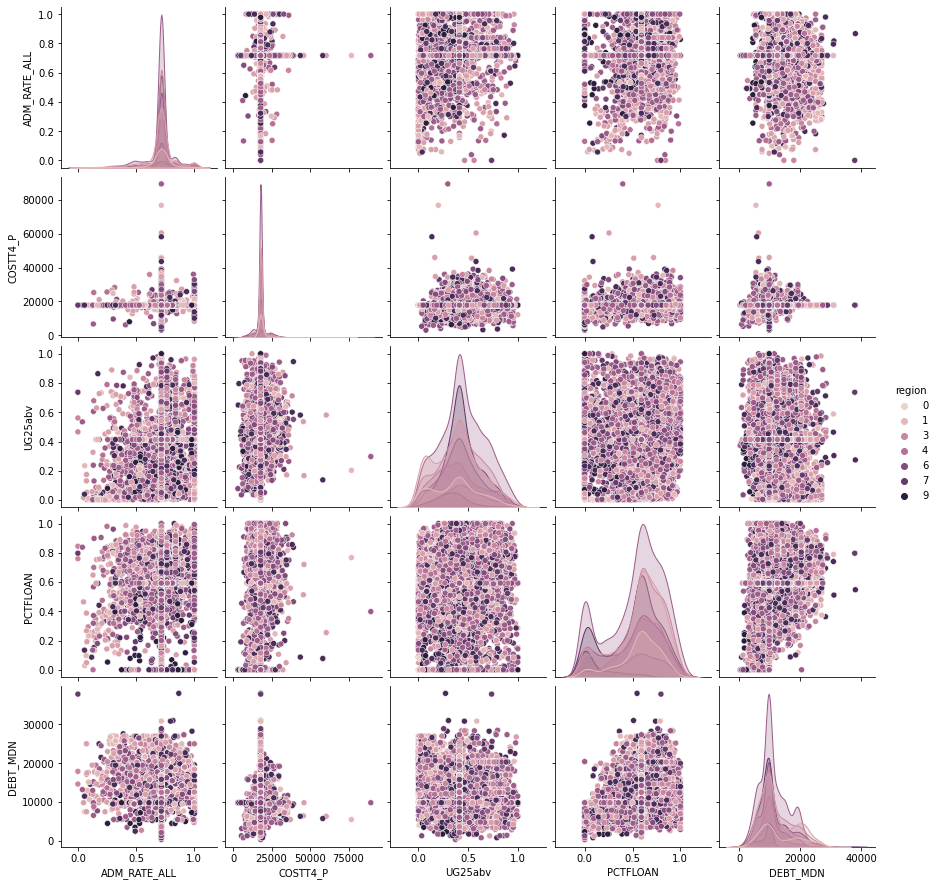

In [84]:
regression_features = ['ADM_RATE_ALL', 'COSTT4_P', 'UG25abv', 'PCTFLOAN', 'DEBT_MDN']
sns.pairplot(data=df, vars=regression_features, hue='region')

In [ ]:
#A lot of the hue-ing still looks random, but an interesting find is the distribution of PCTFLOAN, which is bimodal. That immediately suggests two potential clusters, each centered around one of the modes

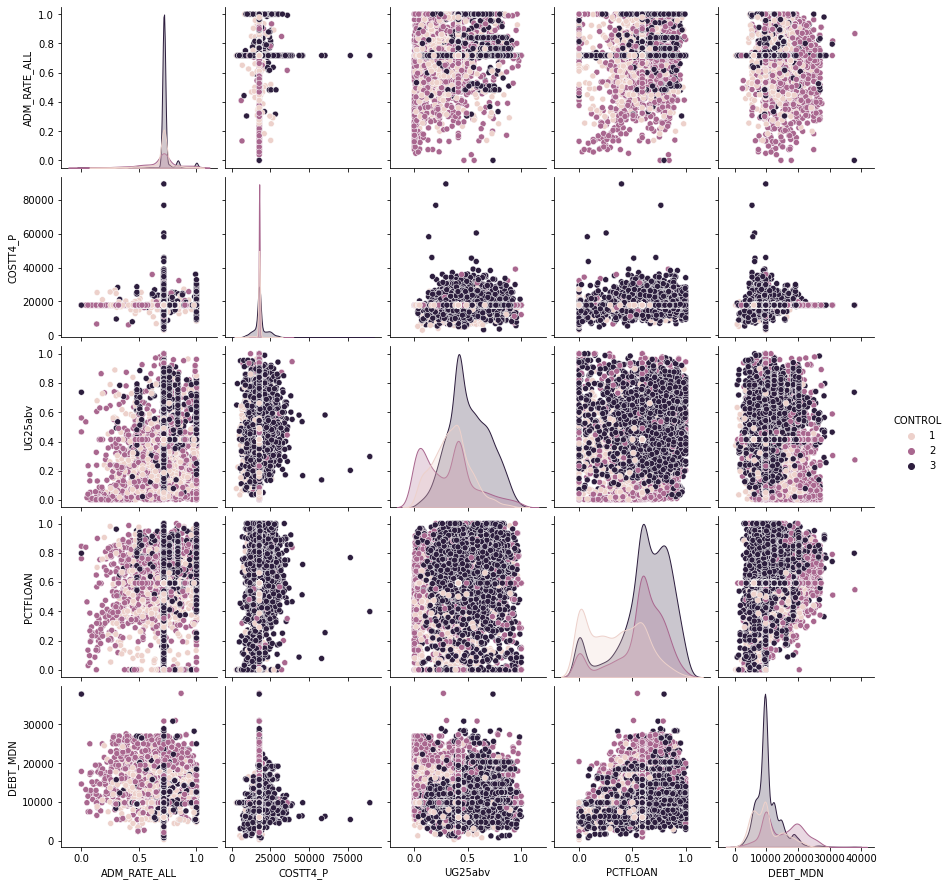

In [85]:
sns.pairplot(data=df, vars=regression_features, hue='CONTROL')

In [ ]:
#The hue-ing seems far less random than the previous pairplot, there are definitely some interesting patterns visible here

In [ ]:
#Another thing I considered doing to introduce another potential hue-ing variable was to combine related boolean 1/0 columns into a single column. For example, the ethnicity columns and the gender columns

In [62]:
combined_series = ["NONE" for j in range(len(df)+1)]
columns_to_combine = ['HBCU', 'ANNHI', 'PBI', 'AANAPII', 'NANTI', 'HSI', 'TRIBAL']
for i in range(len(df)):
    for col in columns_to_combine:
        if(df[col].iloc[i] == 1):
            combined_series[i] = col
df['ETHNIC_FOCUS'] = pd.Series(combined_series)

combined_series = ["NEITHER" for j in range(len(df)+1)]
columns_to_combine = ['MENONLY', 'WOMENONLY']
for i in range(len(df)):
    for col in columns_to_combine:
        if(df[col].iloc[i] == 1):
            combined_series[i] = col
df['GENDER_FOCUS'] = pd.Series(combined_series)

0       HBCU
1       NONE
2       NONE
3       NONE
4       HBCU
        ... 
7799    NONE
7800    NONE
7801    NONE
7802    NONE
7803    NONE
Name: ETHNIC_FOCUS, Length: 7803, dtype: object
0       NEITHER
1       NEITHER
2       NEITHER
3       NEITHER
4       NEITHER
         ...   
7799    NEITHER
7800    NEITHER
7801    NEITHER
7802    NEITHER
7803    NEITHER
Name: GENDER_FOCUS, Length: 7803, dtype: object


In [63]:
ethnic_df = df[df['ETHNIC_FOCUS'] != "NONE"]
gender_df = df[df['GENDER_FOCUS'] != "NEITHER"]

,Unnamed: 0,UNITID,OPEID,opeid6,INSTURL,HCM2,main,NUMBRANCH,CONTROL,st_fips,...,HI_INC_RPY_3YR_RT_SUPP,DEP_RPY_3YR_RT_SUPP,PELL_RPY_3YR_RT_SUPP,NOPELL_RPY_3YR_RT_SUPP,FEMALE_RPY_3YR_RT_SUPP,MALE_RPY_3YR_RT_SUPP,FIRSTGEN_RPY_3YR_RT_SUPP,NOTFIRSTGEN_RPY_3YR_RT_SUPP,ETHNIC_FOCUS,GENDER_FOCUS
0,0,100654,100200,1002,www.aamu.edu/,0,1,1,1,1,...,0.422018,0.442857,0.443587,0.452514,0.484819,0.406000,0.423581,0.442453,HBCU,NEITHER
4,4,100724,100500,1005,www.alasu.edu/email/index.aspx,0,1,1,1,1,...,0.333333,0.324102,0.320017,0.380829,0.364424,0.286531,0.315737,0.334633,HBCU,NEITHER
12,12,101073,1055400,10554,www.ccal.edu/,0,1,1,2,1,...,0.764454,0.209302,0.254237,0.729680,0.378378,0.179348,0.284553,0.268041,HBCU,NEITHER
17,17,101240,101700,1017,www.gadsdenstate.edu,0,1,1,1,1,...,0.764454,0.633333,0.529617,0.729680,0.598226,0.547753,0.573178,0.612903,HBCU,NEITHER
25,25,101462,526000,5260,www.drakestate.edu,0,1,1,1,1,...,0.764454,0.633333,0.529617,0.729680,0.598226,0.547753,0.573178,0.612903,HBCU,NEITHER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6467,6467,456481,2100001,21000,www.pupr.edu,0,0,3,2,12,...,0.909091,0.786325,0.731481,0.757062,0.726891,0.739726,0.724719,0.744643,HSI,NEITHER
6765,6765,460455,4155301,41553,www.ostm.edu/,0,0,2,3,36,...,0.764454,0.633333,0.696970,0.729680,0.744186,0.547753,0.573178,0.612903,HSI,NEITHER
6834,6834,461306,4164600,41646,dadorsey.dadeschools.net/,0,1,1,1,12,...,0.764454,0.633333,0.529617,0.729680,0.598226,0.547753,0.573178,0.612903,TRIBAL,NEITHER
7234,7234,480930,2149902,21499,woodbridge.paulmitchell.edu/,0,0,3,3,51,...,0.873239,0.818841,0.656716,0.863636,0.745098,0.547753,0.709402,0.782857,TRIBAL,NEITHER


<AxesSubplot:xlabel='PCTFLOAN', ylabel='DEBT_MDN'>

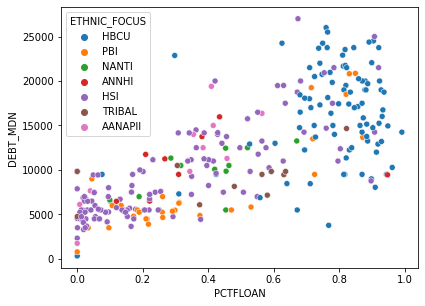

In [75]:
plt.rcParams['figure.figsize'] = [6.4, 4.8]
sns.scatterplot(x='PCTFLOAN', y='DEBT_MDN', hue='ETHNIC_FOCUS', data=ethnic_df)

<AxesSubplot:xlabel='UG25abv', ylabel='ADM_RATE_ALL'>

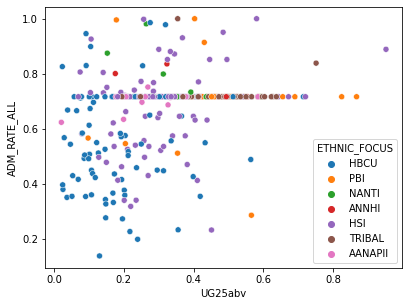

In [79]:
sns.scatterplot(x='UG25abv', y='ADM_RATE_ALL', hue='ETHNIC_FOCUS', data=ethnic_df)

In [ ]:
#From the previous plots, perhaps there isn't much to infer about potential clusterings dependent on ethnicity information